In [130]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
from matplotlib import pyplot as plt

# Introduction
This notebook explores the classic percolation model for bushfire modelling and considers the Poisson distribution later.

In [119]:
def create_lattice(p, N, mode):
    rng = default_rng()
        
    if mode == 'bernoulli':
        x = rng.uniform(low=0, high=1, size=(N, N))
        y = x < p
    elif mode == 'poisson':
        y = rng.poisson(lam=p, size=(N, N))
    return y.astype(int)

# check if node contains fuel
def burnable(node, lattice):
    return lattice[node] > 0

# returns false if index is outside of lattice
def in_lattice(index, lattice):
    m, n = lattice.shape
    i, j = index
    if not 0 <= i <= m-1 or not 0 <= j <= n-1:
        return False
    else:
        return True

def get_neighbours(node, lattice):
    # get neighbours based on reach, i.e. node value
    # same for bernoulli and poisson modes, reach = L_inf distance
    nbs = []
    i, j = node
    reach = lattice[node]
#     k + l <= reach
    for k in range(reach + 1):
        for l in range(reach + 1 - k):
            for signk in [-1, 1]:
                for signl in [-1, 1]:
                    nb = (i + signk*k, j + signl* l)
                    if in_lattice(nb, lattice):
                        nbs.append(nb)
            
    # remove duplicates from k=0 or l=0
    nbs = list(set(nbs))
    # remove original node, case k=l=0
    if node in nbs:
        nbs.remove(node)
    return nbs
    
    

## Testing

In [120]:
x = create_lattice(.5, 5, 'bernoulli')
x

array([[1, 0, 0, 0, 1],
       [0, 0, 1, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 1, 1, 0]])

In [121]:
y = create_lattice(.5, 5, 'poisson')
y

array([[0, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [0, 1, 1, 0, 2],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])

In [122]:
index = (0, 0)
print(in_lattice(index, x))
print(in_lattice((0, 4), x))


True
True


In [123]:
get_neighbours((0, 1), x)

[]

In [124]:
def simulate(p, N, mode):
    # initialize
    lattice = create_lattice(p, N, mode)
    matrices = [np.copy(lattice)]
    
    front = []
    archive = []
    
    # add burnable nodes in top row to front
    I, J = np.where(lattice[:1] > 0)
    for index in zip(I, J):
        front.append(index)
        
    # spread fire until front is emtpy
    while front:
        new_front = []
        
        for node in front:
            # get neighbours before burning
            nbs = get_neighbours(node, lattice)
            lattice[node] = -1
            
            # add burnable neighbours to new front
            for nb in nbs:
                if not nb in front and not nb in archive and burnable(nb, lattice):
                    new_front.append(nb)
        
        # update archive
        archive = archive + front
        # update front
        front = new_front
        
        # save snapshot of current lattice
        mat = np.copy(lattice)
        matrices.append(mat)
        
    return matrices

In [155]:
mats = simulate(.5, 5, 'poisson')

In [156]:
for mat in mats:
    print(mat, '\n')

[[1 0 0 0 2]
 [0 2 0 0 0]
 [1 1 1 0 1]
 [0 0 0 0 0]
 [1 0 2 0 0]] 

[[-1  0  0  0 -1]
 [ 0  2  0  0  0]
 [ 1  1  1  0  1]
 [ 0  0  0  0  0]
 [ 1  0  2  0  0]] 

[[-1  0  0  0 -1]
 [ 0  2  0  0  0]
 [ 1  1  1  0 -1]
 [ 0  0  0  0  0]
 [ 1  0  2  0  0]] 



# Plotting and Animating

In [131]:
mat = mats[0]

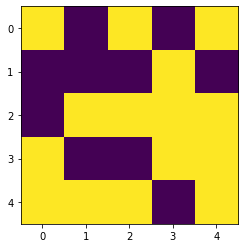

In [132]:
plt.subplots()
plt.imshow(mat)

## Create Custom Color Map

In [144]:
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import ListedColormap

In [145]:
red = np.array([colors.to_rgba('firebrick')])
brown = np.array([colors.to_rgba('tan')])
greens = cm.get_cmap('Greens', 256)
newcolors = greens(np.linspace(0, 1, 256))


In [158]:
newcolors[:25, :] = red
newcolors[25:129, :] = brown
newcmp = ListedColormap(newcolors)

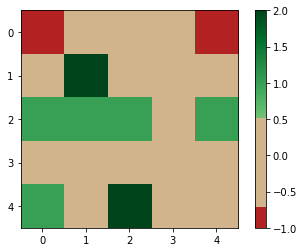

In [159]:
plt.imshow(mats[1], cmap = newcmp, vmin = -1)
plt.colorbar(

# Create Animation

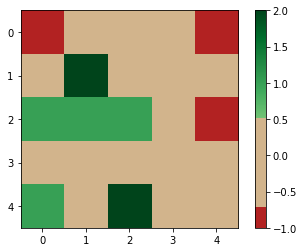

In [162]:
ims = []
plt.subplots()
for mat in mats:
    im = plt.imshow(mat, cmap = newcmp, vmin = -1)
    ims.append(im)
plt.colorbar()